In [1]:
import numpy as np
from scipy.optimize import minimize


In [2]:
# 模拟一个简单的模型,实际情况下需要替换为你的实际模型或系统
def simulate_model(x):
    # 这里是模拟模型的逻辑,可能会调用一些复杂的计算
    y = x[0] ** 2 + x[1] ** 2 + np.random.normal(scale=0.1)  # 一个简单的二次型模型,加上一些噪声
    return y

# 定义线性模型
def linear_model(x, a, b):
    return a * x + b

# 定义损失函数
def loss_function(x):
    # 模型参数
    a, b = x

    # 模拟观测数据
    observed_data = np.array([1.8, 3.2, 5.1])  # 假设观测到的数据

    # 模型预测值
    H_x = linear_model(observed_data, a, b)

    # 先验均值
    xb = np.array([2.0, 1.0])  # 假设的先验均值

    # 观测误差协方差矩阵
    R = np.eye(len(observed_data)) * 0.1  # 假设观测误差是独立同分布的,方差为0.1

    # 参数先验协方差矩阵
    B = np.eye(2) * 0.5  # 假设参数是独立的,方差为0.5

    # 计算损失函数 J(x)
    J_x = 0.5 * ((observed_data - H_x).T @ np.linalg.inv(R) @ (observed_data - H_x) + (x - xb).T @ np.linalg.inv(B) @ (x - xb))

    return J_x

In [3]:
# 执行贝叶斯优化
from skopt import gp_minimize

result = gp_minimize(loss_function, [(0.0, 5.0), (0.0, 5.0)])  # 参数的搜索范围

# 输出优化结果
optimized_params = result.x
optimized_loss = result.fun

print("优化后的参数值:", optimized_params)
print("最小化损失值:", optimized_loss)


优化后的参数值: [0.9444512870964544, 0.2428330095323945]
最小化损失值: 1.8188712897223331


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Simulate a simple linear model
def linear_model(x, a, b):
    return a * x + b

# Define the loss function
def loss_function(params, observed_data, x_values):
    a, b = params

    # Model predictions
    model_predictions = linear_model(x_values, a, b)

    # Prior mean
    xb = np.array([2.0, 1.0])  # Adjust this based on your specific prior knowledge

    # Observation error covariance matrix
    R = np.eye(len(observed_data)) * 0.1  # Assuming diagonal matrix with variance 0.1

    # Parameter prior covariance matrix
    B = np.eye(2) * 0.5  # Assuming diagonal matrix with variance 0.5

    # Calculate the loss function value
    J_x = 0.5 * ((observed_data - model_predictions).T @ np.linalg.inv(R) @ (observed_data - model_predictions) +
                 (params - xb).T @ np.linalg.inv(B) @ (params - xb))

    return J_x.item()  # Convert the result to a scalar

# Simulated observed output data
observed_data = np.array([1.8, 3.2, 5.1])

# Simulated input features
x_values = np.array([0, 1, 2])  # Replace with your actual input features

# Initial guess for model parameters
initial_guess = np.array([0, 0])

# Minimize the loss function
result = minimize(loss_function, initial_guess, args=(observed_data, x_values), method='BFGS')

# Output the optimization result
optimized_params = result.x
optimized_loss = result.fun

print("Optimized parameter values:")
print(optimized_params)
print("Minimized loss value:")
print(optimized_loss)


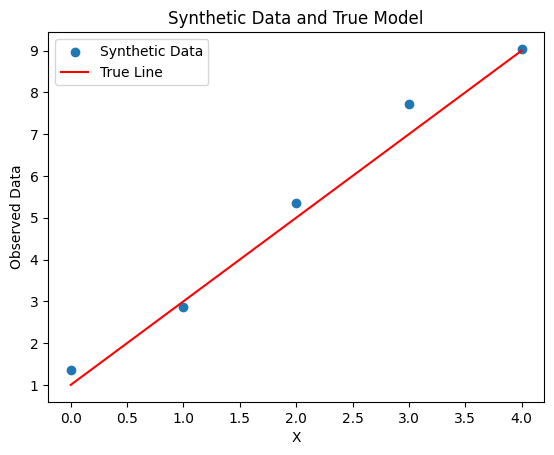

/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10305/1502599720.py:48: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio = posterior(proposed_params, x, y) / posterior(current_params, x, y)
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10305/1502599720.py:48: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_ratio = posterior(proposed_params, x, y) / posterior(current_params, x, y)


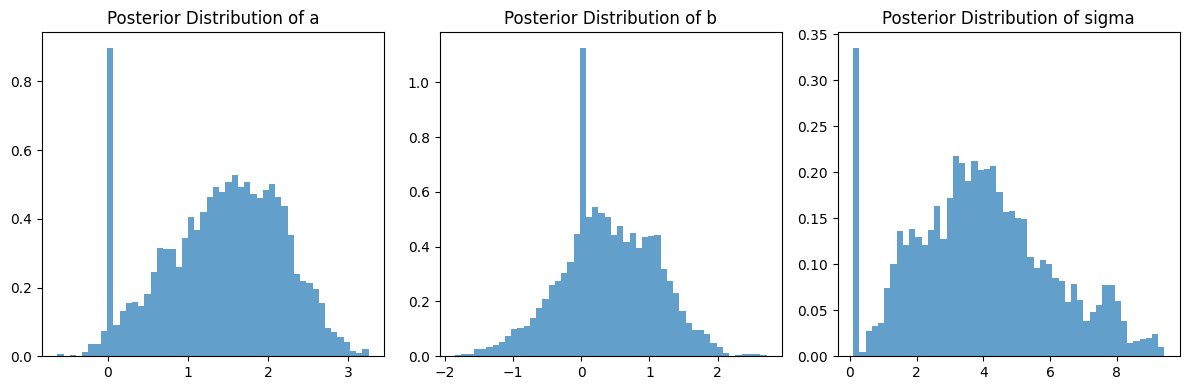

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# True parameters of the linear model
true_a = 2.0
true_b = 1.0

# Generate synthetic data
x_values = np.array([0, 1, 2, 3, 4])
noise = np.random.normal(0, 0.5, len(x_values))  # Gaussian noise
observed_data = true_a * x_values + true_b + noise

# Plot the synthetic data
plt.scatter(x_values, observed_data, label='Synthetic Data')
plt.plot(x_values, true_a * x_values + true_b, 'r', label='True Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('Observed Data')
plt.title('Synthetic Data and True Model')
plt.show()

# Bayesian linear regression using Metropolis-Hastings MCMC

# Define the prior distribution for a, b, and sigma
def prior(params):
    a, b, sigma = params
    return np.exp(-0.5 * (a**2 + b**2)) / sigma

# Define the likelihood function
def likelihood(params, x, y):
    a, b, sigma = params
    predicted = a * x + b
    return np.exp(-0.5 * np.sum((y - predicted)**2) / sigma**2)

# Define the posterior distribution (proportional to prior * likelihood)
def posterior(params, x, y):
    return prior(params) * likelihood(params, x, y)

# Metropolis-Hastings MCMC sampler
def metropolis_hastings(initial_params, iterations, x, y):
    params_chain = [initial_params]

    for _ in range(iterations):
        current_params = params_chain[-1]
        proposed_params = current_params + np.random.normal(0, 0.1, len(current_params))

        # Accept or reject the proposal based on the Metropolis criterion
        acceptance_ratio = posterior(proposed_params, x, y) / posterior(current_params, x, y)
        if np.random.uniform(0, 1) < acceptance_ratio:
            params_chain.append(proposed_params)
        else:
            params_chain.append(current_params)

    return np.array(params_chain)

# Initial guess for model parameters
initial_params = np.array([0, 0, 0.1])  # [a, b, sigma]

# Run Metropolis-Hastings MCMC sampler
iterations = 10000
params_chain = metropolis_hastings(initial_params, iterations, x_values, observed_data)

# Plot the posterior distributions of parameters
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(params_chain[:, 0], bins=50, density=True, alpha=0.7)
plt.title('Posterior Distribution of a')

plt.subplot(132)
plt.hist(params_chain[:, 1], bins=50, density=True, alpha=0.7)
plt.title('Posterior Distribution of b')

plt.subplot(133)
plt.hist(params_chain[:, 2], bins=50, density=True, alpha=0.7)
plt.title('Posterior Distribution of sigma')

plt.tight_layout()
plt.show()

/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10305/2691598388.py:9: RuntimeWarning: divide by zero encountered in log
  log_posterior_chain = [np.log(posterior(initial_params, x, y))]
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10305/2691598388.py:16: RuntimeWarning: divide by zero encountered in log
  log_posterior_current = np.log(posterior(current_params, x, y))
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10305/2691598388.py:17: RuntimeWarning: divide by zero encountered in log
  log_posterior_proposed = np.log(posterior(proposed_params, x, y))
/var/folders/n5/mtl0tfjj3n90drkm4zmwch4c0000gn/T/ipykernel_10305/2691598388.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  acceptance_ratio = log_posterior_proposed - log_posterior_current


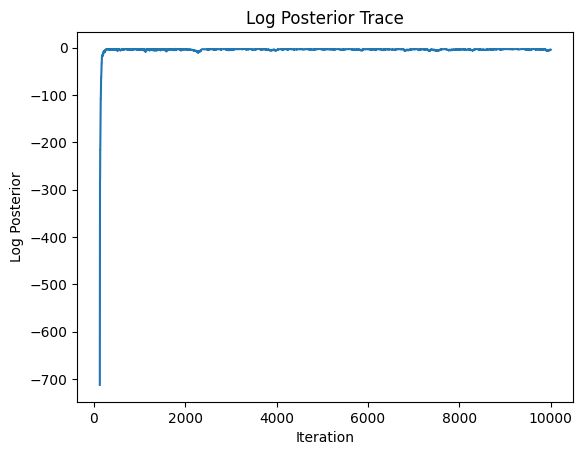

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code remains unchanged)

# Metropolis-Hastings MCMC sampler with log posterior tracking
def metropolis_hastings(initial_params, iterations, x, y):
    params_chain = [initial_params]
    log_posterior_chain = [np.log(posterior(initial_params, x, y))]

    for _ in range(iterations):
        current_params = params_chain[-1]
        proposed_params = current_params + np.random.normal(0, 0.1, len(current_params))

        # Compute log posteriors for current and proposed parameters
        log_posterior_current = np.log(posterior(current_params, x, y))
        log_posterior_proposed = np.log(posterior(proposed_params, x, y))

        # Accept or reject the proposal based on the Metropolis criterion
        acceptance_ratio = log_posterior_proposed - log_posterior_current
        if np.log(np.random.uniform(0, 1)) < acceptance_ratio:
            params_chain.append(proposed_params)
            log_posterior_chain.append(log_posterior_proposed)
        else:
            params_chain.append(current_params)
            log_posterior_chain.append(log_posterior_current)

    return np.array(params_chain), np.array(log_posterior_chain)

# Run Metropolis-Hastings MCMC sampler
params_chain, log_posterior_chain = metropolis_hastings(initial_params, iterations, x_values, observed_data)

# Plot the log posterior over iterations
plt.plot(log_posterior_chain)
plt.xlabel('Iteration')
plt.ylabel('Log Posterior')
plt.title('Log Posterior Trace')
plt.show()
